# Data Analysis Project - Summer 2023

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [2]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**: What is the distribution of customer lifetime values?


**Answer**: According to the customer lifetime values, the values range from -4285.0 to 16465.0. The median lifetime value of a customer is 574.0, while the mean lifetime value is 922.1. This suggests that customer lifetime values vary, with some customers having negative values and others having relatively higher values. The histogram plot depicts the distribution of customer lifetime values, with the number of values within each bin indicated.

## Supporting Analysis

In [4]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4285.0  -396.0   574.0   922.1  1814.0 16465.0 

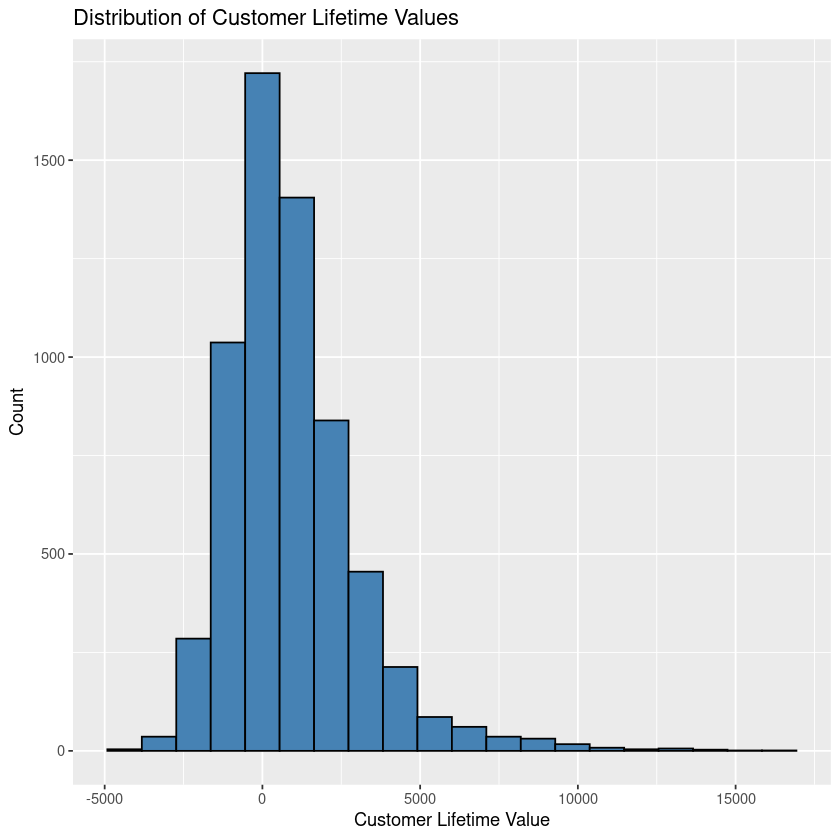

In [5]:
summary(claims_df$customer_lifetime_value)

library(ggplot2)

ggplot(claims_df, aes(x = customer_lifetime_value)) +
  geom_histogram(fill = "steelblue", bins = 20, color="black") +
  labs(title = "Distribution of Customer Lifetime Values",
       x = "Customer Lifetime Value",
       y = "Count")


## Question 2


**Question**: How does the customer lifetime value vary across different states?



**Answer**:The average customer lifetime value differs by state. Nevada has the highest average customer lifetime value in the dataset, at 971.1314, followed by Arizona at 956.1270. The average value in Oregon is 947.2933, while the average values in Washington and California are 867.0668 and 883.1191, respectively.

After removing outliers, the second box plot shows a clear view of the distribution with no extreme values.We can better focus on the distribution of customer lifetime values within each state and observe any patterns or differences between states by removing outliers.



## Supporting Analysis


customer_state,avg_lifetime_value
<fct>,<dbl>
Washington,867.0668
Oregon,947.2933
California,883.1191
Nevada,971.1314
Arizona,956.1270


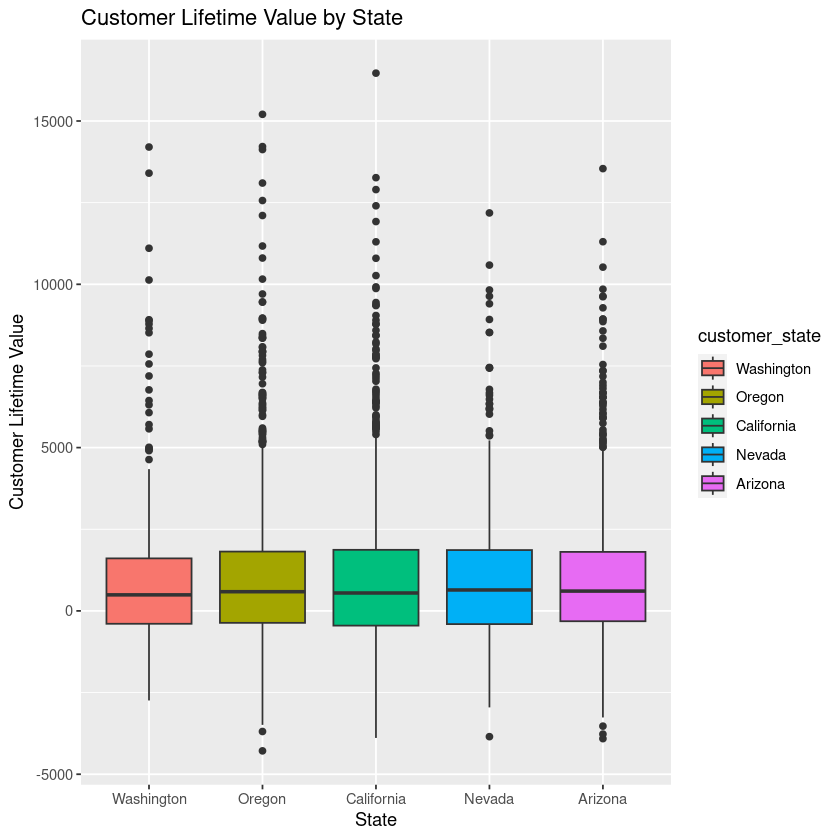

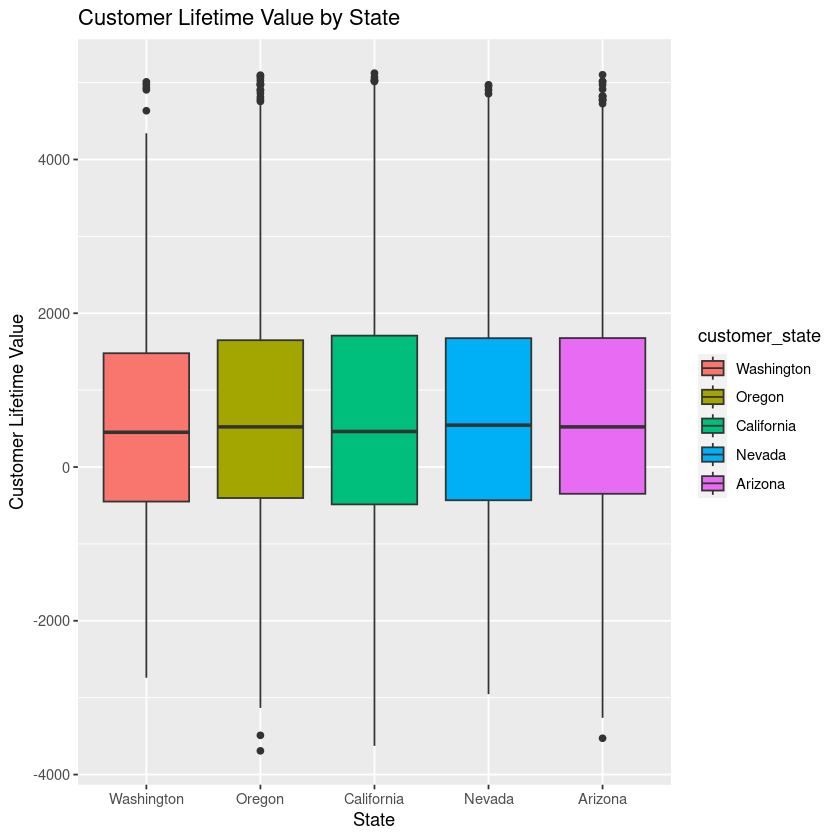

In [13]:
state_lifetime_value <- claims_df %>%
  group_by(customer_state) %>%
  summarize(avg_lifetime_value = mean(customer_lifetime_value))

state_lifetime_value

ggplot(claims_df, aes(x = customer_state, y = customer_lifetime_value, fill = customer_state)) +
  geom_boxplot() +
  labs(title = "Customer Lifetime Value by State",
       x = "State",
       y = "Customer Lifetime Value")

# Calculate the quartiles and IQR
Q1 <- quantile(claims_df$customer_lifetime_value, 0.25)
Q3 <- quantile(claims_df$customer_lifetime_value, 0.75)
IQR <- Q3 - Q1

# Define the outlier threshold
threshold <- 1.5 * IQR

# Filter out outliers
filtered_df <- claims_df %>%
  filter(customer_lifetime_value >= Q1 - threshold & customer_lifetime_value <= Q3 + threshold)

ggplot(filtered_df, aes(x = customer_state, y = customer_lifetime_value, fill = customer_state)) +
  geom_boxplot() +
  labs(title = "Customer Lifetime Value by State",
       x = "State",
       y = "Customer Lifetime Value")




## Question 3


**Question**:Are customers with a certain employment status more profitable for the company?



**Answer**:The average customer lifetime value differs depending on employment status. Customers with the employment status "Disabled" have the highest average customer lifetime value (1141.3342), indicating that they are more profitable for the company. Retired customers have a higher average customer lifetime value of 982.0496, as well. Customers on "Medical Leave" have the highest average customer lifetime value of 966.1663, while "Employed" customers have the lowest average customer lifetime value of 898.5017.



## Supporting Analysis


employment_status,avg_lifetime_value
<fct>,<dbl>
Employed,898.5017
Medical Leave,966.1663
Disabled,1141.3342
Retired,982.0496


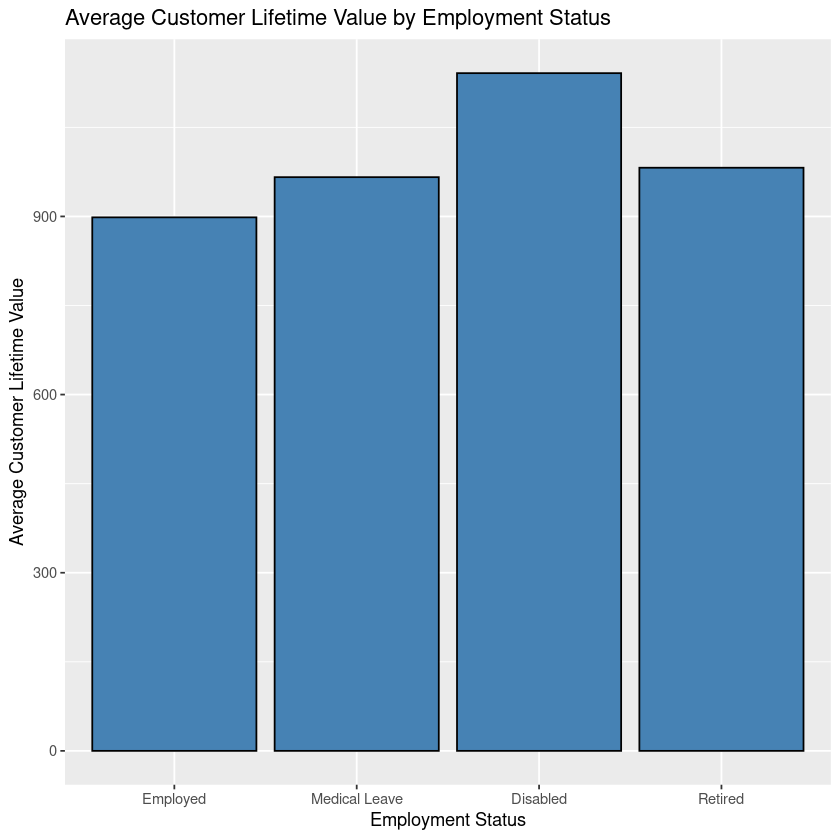

In [5]:
library(ggplot2)
employment_profitability <- claims_df %>%
                            group_by(employment_status) %>%
                            summarize(avg_lifetime_value = mean(customer_lifetime_value))

employment_profitability



ggplot(employment_profitability, aes(x = employment_status, y = avg_lifetime_value)) +
  geom_bar(stat = "identity", fill = "steelblue",color="black") +
  labs(title = "Average Customer Lifetime Value by Employment Status",
       x = "Employment Status",
       y = "Average Customer Lifetime Value")

## Question 4


**Question**:How does the customer lifetime value vary based on gender and marital status?



**Answer**:According to the findings, females, particularly those who are single, have higher average customer lifetime values than males. Females who are married have a slightly lower lifetime value than females who are single. Males, regardless of marital status, have lower average lifetime values when compared to females. These findings highlight the potential profitability of targeting single females, as well as the need for additional research to understand the underlying factors influencing customer behavior and lifetime value across gender and marital status segments.

## Supporting Analysis


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


gender,marital_status,avg_lifetime_value
<fct>,<fct>,<dbl>
Female,Single,1246.1123
Female,Married,1108.2288
Female,Divorced,1220.2495
Male,Single,683.6941
Male,Married,706.3467
Male,Divorced,624.9924


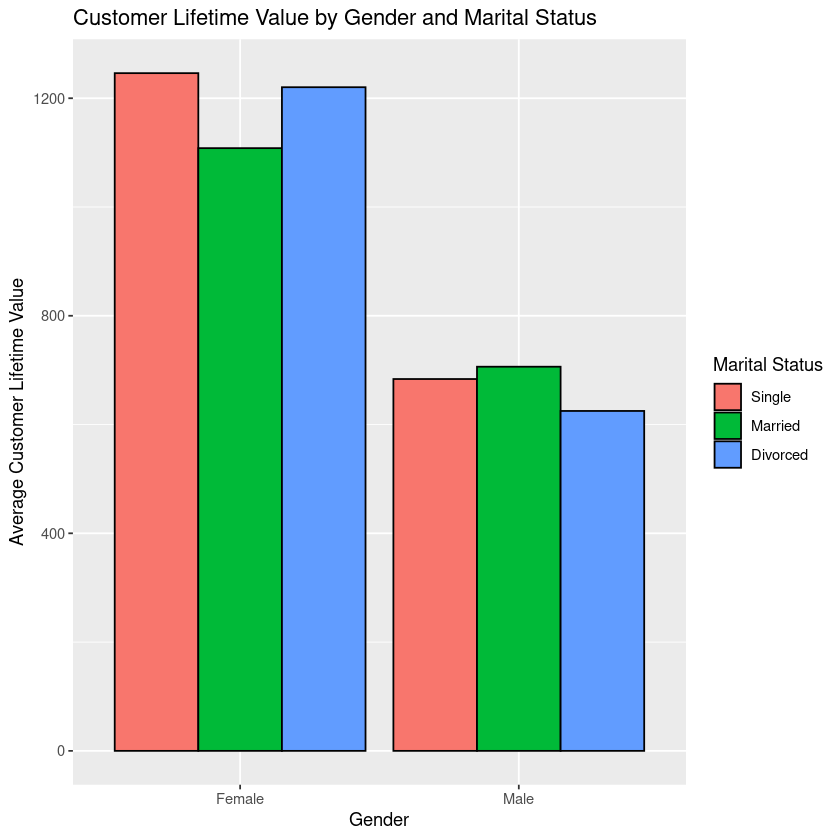

In [6]:
library(dplyr)
library(ggplot2)

# Calculate the average customer lifetime value for each combination of gender and marital status
gender_marital_lifetime <- claims_df %>%
  group_by(gender, marital_status) %>%
  summarize(avg_lifetime_value = mean(customer_lifetime_value))

gender_marital_lifetime
# Create a grouped bar chart
ggplot(gender_marital_lifetime, aes(x = gender, y = avg_lifetime_value, fill = marital_status)) +
  geom_bar(stat = "identity", position = "dodge",color="black") +
  labs(title = "Customer Lifetime Value by Gender and Marital Status",
       x = "Gender",
       y = "Average Customer Lifetime Value",
       fill = "Marital Status")

## Question 5


**Question**:How does the customer lifetime value vary across different levels of coverage and policy types?



**Answer**:The Premium coverage category has the highest average customer lifetime values, particularly for Personal and Corporate policy types.The Basic coverage category, specifically the Special policy type, has the lowest average customer lifetime values.Across all policy types, the Extended coverage category has moderate average lifetime values.



## Supporting Analysis


`summarise()` has grouped output by 'coverage'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


coverage,policy,avg_lifetime_value
<fct>,<fct>,<dbl>
Basic,Personal,327.44760
Basic,Corporate,366.52795
Basic,Special,94.08917
Extended,Personal,1533.37345
Extended,Corporate,1566.03242
Extended,Special,1501.91860
Premium,Personal,2916.97465
Premium,Corporate,2789.54098
Premium,Special,2612.50000


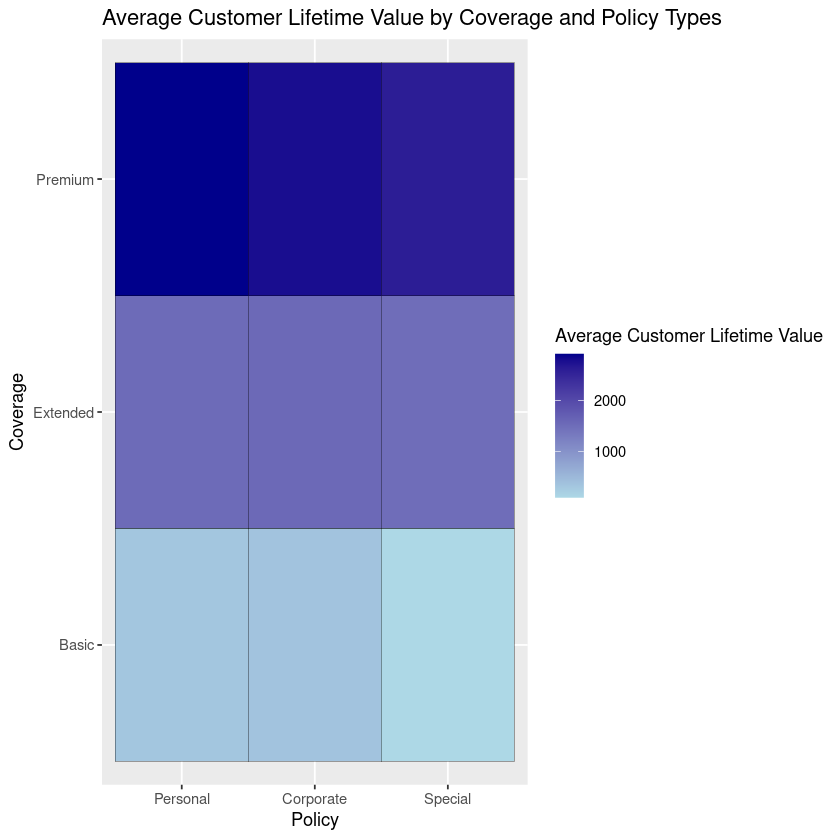

In [7]:
library(dplyr)

avg_lifetime_value <- claims_df %>%
  group_by(coverage, policy) %>%
  summarize(avg_lifetime_value = mean(customer_lifetime_value))

avg_lifetime_value
library(ggplot2)


# Create the heat map
ggplot(avg_lifetime_value, aes(x = policy, y = coverage, fill = avg_lifetime_value)) +
  geom_tile(color="black") +
  labs(title = "Average Customer Lifetime Value by Coverage and Policy Types",
       x = "Policy",
       y = "Coverage",
       fill = "Average Customer Lifetime Value") +
  scale_fill_gradient(low = "lightblue", high = "darkblue")



## Question 6


**Question**:How does the customer lifetime value vary based on the customer's vehicle class and vehicle size?



**Answer**:The vehicle class and size have a significant impact on customer lifetime value. Customers with higher lifetime value are drawn to sports cars and luxury vehicles, particularly luxury SUVs, indicating their preference for premium and high-end vehicles. Furthermore, small-sized luxury cars and luxury SUVs perform well in terms of average lifetime value.



## Supporting Analysis


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.
New names:
• `` -> `...1`


vehicle_class,vehicle_size,avg_lifetime_value
<fct>,<fct>,<dbl>
Two-Door Car,Small,329.7684
Two-Door Car,Midsize,242.6279
Two-Door Car,Large,312.3309
Four-Door Car,Small,227.7277
Four-Door Car,Midsize,276.9256
Four-Door Car,Large,323.9313
Sports Car,Small,2316.5962
Sports Car,Midsize,2158.8252
Sports Car,Large,1937.1351


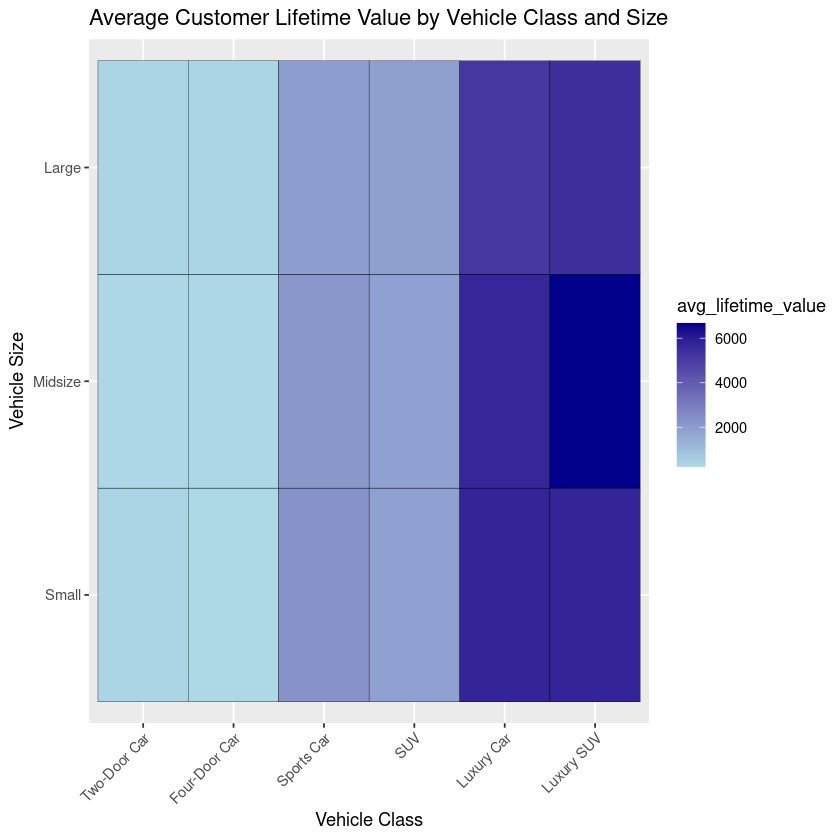

In [8]:
library(ggplot2)

vehicle_lifetime_value <- claims_df %>%
  group_by(vehicle_class, vehicle_size) %>%
  summarize(avg_lifetime_value = mean(customer_lifetime_value))

vehicle_lifetime_value

# Create the heat map


ggplot(vehicle_lifetime_value, aes(x = vehicle_class, y = vehicle_size, fill = avg_lifetime_value)) +
  geom_tile(color="black") +
  labs(title = "Average Customer Lifetime Value by Vehicle Class and Size",
       x = "Vehicle Class",
       y = "Vehicle Size") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_fill_gradient(low = "lightblue", high = "darkblue")


## Question 7


**Question**:Does the monthly premium paid by customers have a significant impact on their customer lifetime value?



**Answer**:Customer_lifetime_value and monthly_premium have a correlation coefficient of 0.7368989.

This positive correlation indicates that these two variables have a moderately strong relationship. A correlation coefficient of 0.7368989 indicates that higher monthly_premium values are associated with higher customer_lifetime_value values.

Customers who pay higher monthly premiums, on the other hand, have higher lifetime values for the company. This finding suggests that customers who choose higher premium plans benefit financially.



## Supporting Analysis


Correlation between customer_lifetime_value and monthly_premium: 0.7368989

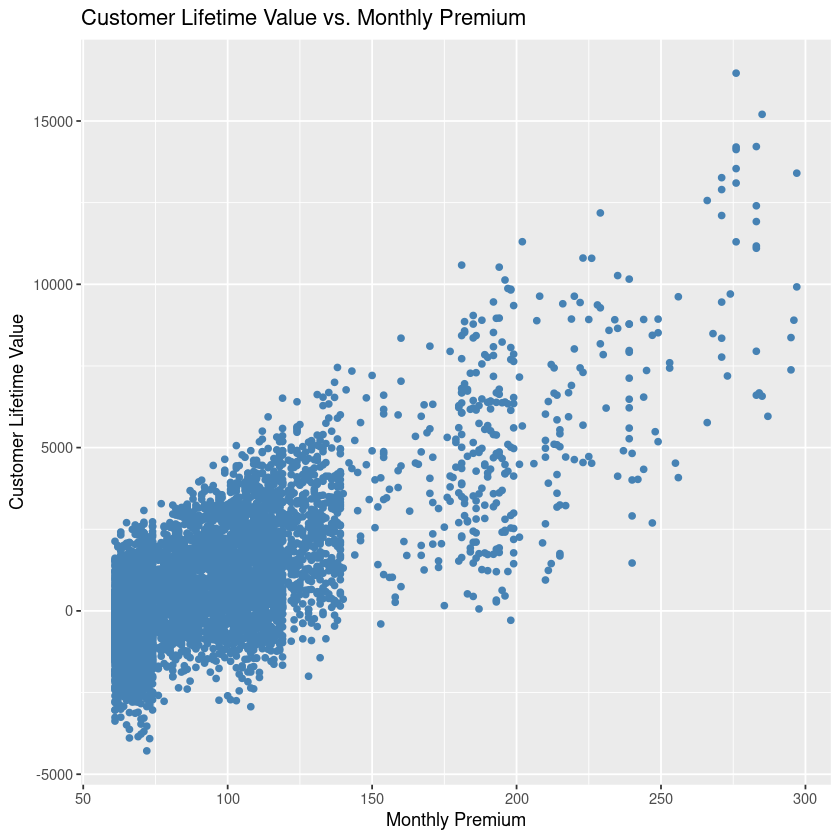

In [17]:
library(ggplot2)

# Calculate correlation coefficient
correlation <- cor(claims_df$customer_lifetime_value, claims_df$monthly_premium)

# Print the correlation coefficient
cat("Correlation between customer_lifetime_value and monthly_premium:", correlation)

# Create scatter plot
ggplot(claims_df, aes(x = monthly_premium, y = customer_lifetime_value)) +
  geom_point(color = "steelblue") +
  labs(title = "Customer Lifetime Value vs. Monthly Premium",
       x = "Monthly Premium",
       y = "Customer Lifetime Value")




## Question 8


**Question**:Are there certain vehicle classes that have a higher average claim amount?




**Answer**:The average claim amounts are fairly consistent across vehicle classes. Luxury cars, on the other hand, have the highest average claim amount, followed by two-door and four-door cars. Sports cars and SUVs have slightly lower average claim amounts than other vehicle classes, with Luxury SUVs having the lowest average claim amount.

This data suggests that the type of vehicle class may have an impact on the average claim amount, with Luxury Cars having higher claim amounts than other vehicle classes.


## Supporting Analysis


vehicle_class,avg_claim_amount
<fct>,<dbl>
Two-Door Car,1633.271
Four-Door Car,1631.857
Sports Car,1598.833
SUV,1610.022
Luxury Car,1645.462
Luxury SUV,1592.361


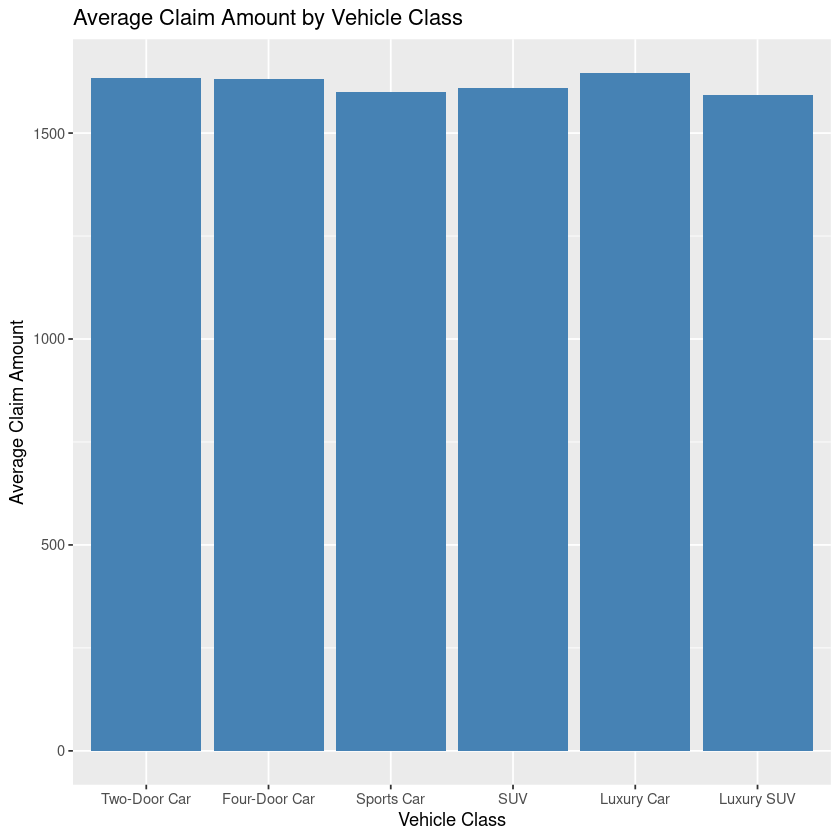

In [21]:
library(ggplot2)

# Calculate the average claim amount for each vehicle class
avg_claim_amount <- claims_df %>%
  group_by(vehicle_class) %>%
  summarize(avg_claim_amount = mean(current_claim_amount))
avg_claim_amount

# Create a bar chart to visualize the average claim amount by vehicle class
ggplot(avg_claim_amount, aes(x = vehicle_class, y = avg_claim_amount)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Average Claim Amount by Vehicle Class",
       x = "Vehicle Class",
       y = "Average Claim Amount")




# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

The goal of this data analysis was to provide an insurance company with insights into customer lifetime value and the various factors that influence it. The company wanted to find ways to improve pricing, improve operations, and make changes to their car insurance policies. Understanding customer lifetime value and its drivers allows the company to make informed decisions that will ensure future success and a competitive advantage in the market.


## Key Findings

1.Customer Lifetime Value: There was significant variation in the distribution of customer lifetime values, with some customers having negative values and others having higher values. This highlights the importance of focusing on customer segmentation and targeting strategies in order to maximize profitability.

2.Geographic Variations: Average customer lifetime values differed by state. States with higher average values included Nevada and Arizona, while Washington and California had slightly lower average values. These findings emphasize the importance of tailoring marketing and retention strategies to geographic factors.

3.Employment Status: Customers with the employment status "Disabled" had the highest average customer lifetime value, followed by retirees. This demonstrates the potential profitability of focusing on these customer segments and developing specialized offerings to meet their needs.

4.Gender and Marital Status: Females, particularly single females, outperformed males in terms of average customer lifetime value. This suggests a chance to focus on this market segment and tailor marketing efforts to attract and retain female customers.

5.Coverage and Policy Types: Premium coverage, specifically Personal and Corporate policy types, had higher average customer lifetime values. This highlights the significance of premium coverage upselling and cross-selling in order to maximize customer lifetime value.


## Recommendations

1.Targeting Specific Customer Segments: According to the research, focusing on disabled and retired customers can lead to higher profits. The company can strengthen its relationship with these customers and increase their lifetime value by providing tailored products and services that cater to their specific needs.

2. Segmentation based on gender and marital status: Create targeted marketing campaigns and incentives to attract and retain single females, who have higher average customer lifetime values. The company can tap into this lucrative segment and drive long-term customer loyalty by understanding their preferences and providing personalized offerings.

3.Geographical Strategies: Take advantage of the insights gained from differences in customer lifetime values across states. Allocate resources strategically to focus on states with higher average values, such as Nevada and Arizona, while also considering growth opportunities in lower-valued regions.

4.Premium Coverage Promotion: Highlight the advantages of premium coverage options and encourage customers to upgrade their policies. The company can increase average customer lifetime values and overall profitability by emphasizing the added value and comprehensive protection provided by premium coverage.

5.Continuous Monitoring and Analysis: Set up a solid data tracking and analysis system to track customer behavior, market trends, and policy performance on a continuous basis. To stay competitive and adapt to changing customer needs, regularly review and refine pricing strategies, policy terms, and operational processes based on data-driven insights.

Business Impact:
Implementing these recommendations can result in a number of positive outcomes for the company. The company can improve customer satisfaction and loyalty by targeting specific customer segments, resulting in increased customer retention and higher customer lifetime values. This will, in turn, contribute to increased profitability and revenue growth. Additionally, optimizing pricing strategies, refining policy offerings, and focusing on geographically advantageous markets can assist the company in remaining competitive and maintaining its market position.

Finally, by leveraging the insights gained from this data analysis, the company can make educated decisions to improve pricing, operational efficiency, and car insurance policy adjustments. In the competitive insurance industry, the company can increase customer lifetime value, profitability, and long-term success by focusing on customer segmentation, targeted marketing efforts, and strategic decision-making.






